<center> <h1>Using GraphWave </h1> </center>

&nbsp;

&nbsp;

The goal of the  following notebook is to show how the GraphWave algorithm can be used. 

GraphWave was implemented in Python 2.7 and requires to load the following Python packages:

+ __pygsp__ (Graph signal Processing package from EPFL, to compute spectral graph wavelets.)
+ __pyemd__ (for computing EMD distances)
+ __networkx__ (for handling network objects: in particular, visualization, etc.)
+ traditional libraries for data analytics: __seaborn__ for plotting, __pandas__ for dataframes


In [2]:
%matplotlib inline
import networkx as nx 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import matplotlib.pyplot as plt
import sys,os
from GraphWave import *
import seaborn as sb


from GraphWave import shapes,graphwave, heat_diffusion,characteristic_functions

from GraphWave.shapes import build_graph,shapes
from GraphWave.heat_diffusion import *
from GraphWave.utils.graph_tools  import *
from GraphWave.utils.utils import *
from GraphWave.characteristic_functions import *


## I. Creating a graph

/home/bjohnson/.anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


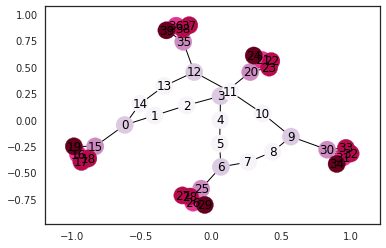

In [3]:
# 1- Start by defining our favorite regular structure

width_basis=15
nbTrials=20


################################### EXAMPLE TO BUILD A SIMPLE REGULAR STRUCTURE ##########
## REGULAR STRUCTURE: the most simple structure:  basis + n small patterns of a single type

### 1. Choose the basis (cycle, torus or chain)
basis_type="cycle" 

### 2. Add the shapes 
nb_shapes=5  ## numbers of shapes to add 
#shape=["fan",6] ## shapes and their associated required parameters  (nb of edges for the star, etc)
#shape=["star",6]
shape=["house"]

### 3. Give a name to the graph
identifier='AA'  ## just a name to distinguish between different trials
name_graph='houses'+ identifier
sb.set_style('white')

### 4. Pass all these parameters to the Graph Structure
add_edges=0
del_edges=0
G,colors=build_graph.build_regular_structure(width_basis,basis_type, nb_shapes,shape, start=0,add_random_edges=add_edges,plot=True,savefig=False)

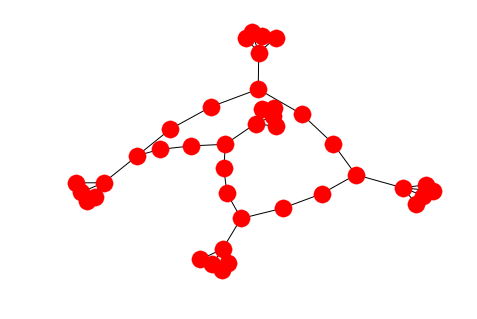

In [4]:
nx.draw(G)

(Note: best visualization of the graphs are obtained using Gephi, or some other specialized graph visualization software)

## II. Running GraphWave


We propose here a simple demonstration of GraphWave using both the automatic version (part a) and the manual version. This shows how to use GraphWave in a parameter-free version, or giving the analyst the possibility to select an adequate scale value.

For each of these approaches, we compute the signature by calling GraphWave. We then compute its PCA projection to visualize the embeddings. Note that in this very simple examples, GraphWave recovers structura equivalence, as shown by the overlapping embeddings on the first principal components.

#### a. Multiscale GraphWave: Automatic selection of the range of scales

In [5]:
from GraphWave.graphwave import *
taus=range(1,10)

In [6]:
chi,heat_print, taus=graphwave(G, 'automatic', verbose=False)

TypeError: compute_fourier_basis() got an unexpected keyword argument 'force_recompute'

We now visualize the resulting embeddings by computing their PCA projections. We also run KMeans to assess how well the signatures that we have here generated enable the recovery of structural roles.

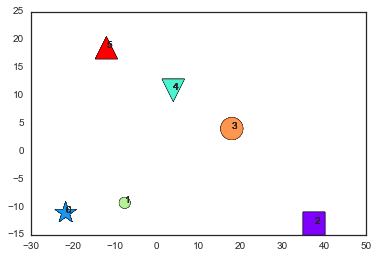

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
nb_clust=len(np.unique(colors))
pca=PCA(n_components=5)
trans_data=pca.fit_transform(StandardScaler().fit_transform(chi))
km=sk.cluster.KMeans(n_clusters=nb_clust)
km.fit(trans_data)
labels_pred=km.labels_
######## Params for plotting
cmapx=plt.get_cmap('rainbow')
x=np.linspace(0,1,np.max(labels_pred)+1)
col=[cmapx(xx) for xx in x ]
markers = {0:'*',1: '.', 2:',',3: 'o',4: 'v',5: '^',6: '<',7: '>',8: 3 ,9:'d',10: '+',11:'x',12:'D',13: '|',14: '_',15:4,16:0,17:1,18:2,19:6,20:7}
########

for c in np.unique(colors):
        indc=[i for i,x in enumerate(colors) if x==c]
        #print indc
        plt.scatter(trans_data[indc,0], trans_data[indc,1],c=np.array(col)[list(np.array(labels_pred)[indc])] ,marker=markers[c%len(markers)],s=500)
labels = colors
for label,c, x, y in zip(labels,labels_pred, trans_data[:, 0], trans_data[:, 1]):
            plt.annotate(label,xy=(x, y), xytext=(0, 0), textcoords='offset points')
            

#### Uniscale GraphWave: Hand-selected value for tau

In [10]:
### Select a scale of interest (here we select a particular range of scale. See associated paper for 
### guidelines on how to select the appropriate scale.)

### Compute the heat wavelet
chi,heat_print, taus=graphwave(G, [1], t=list(np.arange(0,100,0.5)), verbose=False)

2017-11-05 10:18:20,402:[INFO](pygsp.filters.filter.__init__): Heat : has to compute lmax
2017-11-05 10:18:20,406:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-11-05 10:18:20,410:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-11-05 10:18:20,413:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-11-05 10:18:20,417:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-11-05 10:18:20,423:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-11-05 10:18:20,428:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-11-05 10:18:20,432:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-11-05 10:18:20,436:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-11-05 10:18:20,450:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-11-05 10:18:20,460:[INFO](pygsp.filters.filter.analysis): The analysis method

Note that in the EPFL implementation, by construction, the wavelet scales are all divided by the maximum eigenvalue $\lambda_N$.

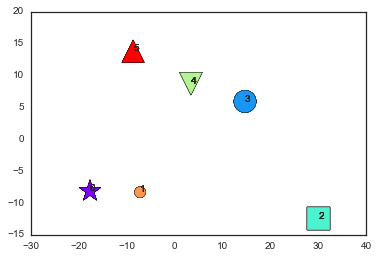

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
nb_clust=len(np.unique(colors))
pca=PCA(n_components=5)
trans_data=pca.fit_transform(StandardScaler().fit_transform(chi))
km=sk.cluster.KMeans(n_clusters=nb_clust)
km.fit(trans_data)
labels_pred=km.labels_
######## Params for plotting
cmapx=plt.get_cmap('rainbow')
x=np.linspace(0,1,np.max(labels_pred)+1)
col=[cmapx(xx) for xx in x ]
markers = {0:'*',1: '.', 2:',',3: 'o',4: 'v',5: '^',6: '<',7: '>',8: 3 ,9:'d',10: '+',11:'x',12:'D',13: '|',14: '_',15:4,16:0,17:1,18:2,19:6,20:7}
########

for c in np.unique(colors):
        indc=[i for i,x in enumerate(colors) if x==c]
        #print indc
        plt.scatter(trans_data[indc,0], trans_data[indc,1],c=np.array(col)[list(np.array(labels_pred)[indc])] ,marker=markers[c%len(markers)],s=500)
labels = colors
for label,c, x, y in zip(labels,labels_pred, trans_data[:, 0], trans_data[:, 1]):
            plt.annotate(label,xy=(x, y), xytext=(0, 0), textcoords='offset points')
            

## III. Visualizing the Characteristic functions

We now propose to show how to visualize characteristic functions.


14
2
30
17
16
31
38
13
18
9


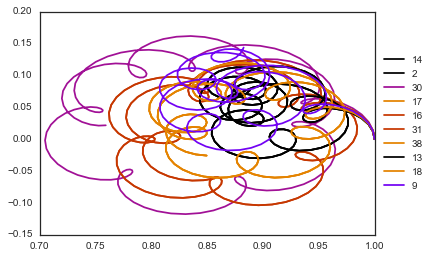

In [12]:
cmap=plt.get_cmap('gnuplot')
colors_plot=[cmap(x) for x in np.linspace(0,1,len(np.unique(colors)))]
plt.figure()
ind_x=range(chi[0].shape[0])[0::2]
ind_y=range(chi[0].shape[0])[1::2]
for i in np.random.choice(range(G.number_of_nodes()),10,replace=False):
    print i
    plt.plot(chi[i][ind_x],chi[i][ind_y],label=str(i),color=colors_plot[colors[i]])
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
